In [1]:
import pandas as pd
data_df = pd.read_csv('congressional_voting_scikit_label_dataset.csv')

In [2]:
import numpy as np
np.random.seed(12345)
%matplotlib inline
import seaborn as sns

import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
data_df.head()

,handicapped_infants,water_project_cost_sharing,adoption_of_the_budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_south_africa,political_party
0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,0.0,2.0,2.0,2.0,1.0,2.0,1.0
1,1.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,0.0,1.0
2,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,0.0
3,1.0,2.0,2.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,0.0
4,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,0.0,2.0,2.0,2.0,2.0,0.0


# Class Distribution

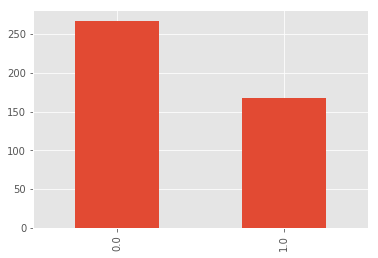

In [4]:
counts = data_df.political_party.value_counts()
ax = counts.plot(kind='bar')

# Feature Counts

In [5]:
columns = data_df.columns
gp = data_df.groupby('political_party')

for column in columns:
    if column != 'political_party':
         print(gp[column].value_counts())       

political_party  handicapped_infants
0.0              2.0                    156
                 1.0                    102
                 0.0                      9
1.0              1.0                    134
                 2.0                     31
                 0.0                      3
Name: handicapped_infants, dtype: int64
political_party  water_project_cost_sharing
0.0              2.0                           120
                 1.0                           119
                 0.0                            28
1.0              2.0                            75
                 1.0                            73
                 0.0                            20
Name: water_project_cost_sharing, dtype: int64
political_party  adoption_of_the_budget_resolution
0.0              2.0                                  231
                 1.0                                   29
                 0.0                                    7
1.0              1.0                 

# Convert to 1-hot encoding

In [6]:
columns = data_df.columns
encoded_df = []

for column in columns:
    if column != 'political_party':
        cat_df = pd.get_dummies(data_df.loc[:, column])
        cols = ['{}_{}'.format(column, i) for i in range(cat_df.shape[1])]
        cat_df.columns = cols
        encoded_df.append(cat_df)
    
encoded_df = pd.concat(encoded_df, axis=1)
encoded_df.loc[:, 'political_party'] = data_df.political_party


In [7]:
encoded_df.head()

,handicapped_infants_0,handicapped_infants_1,handicapped_infants_2,water_project_cost_sharing_0,water_project_cost_sharing_1,water_project_cost_sharing_2,adoption_of_the_budget_resolution_0,adoption_of_the_budget_resolution_1,adoption_of_the_budget_resolution_2,physician_fee_freeze_0,...,crime_0,crime_1,crime_2,duty_free_exports_0,duty_free_exports_1,duty_free_exports_2,export_administration_act_south_africa_0,export_administration_act_south_africa_1,export_administration_act_south_africa_2,political_party
0,0,1,0,0,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,1,1.0
1,0,1,0,0,0,1,0,1,0,0,...,0,0,1,0,1,0,1,0,0,1.0
2,1,0,0,0,0,1,0,0,1,1,...,0,0,1,0,1,0,0,1,0,0.0
3,0,1,0,0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0.0
4,0,0,1,0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0.0


# Model and Cross-Validation

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression


pipeline = Pipeline([
    ('selector', SelectKBest(k=6)),
    ('model', LogisticRegression(solver='lbfgs', verbose=1))
])


In [9]:
cv = StratifiedKFold(n_splits=5, random_state=12345)

scores = cross_validate(
    pipeline,
    encoded_df.drop('political_party', axis=1).values,
    encoded_df.political_party.values,
    cv=cv,
    scoring='f1',
    return_train_score=True,
)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [10]:
scores = pd.DataFrame.from_dict(scores)

In [11]:
scores

,fit_time,score_time,test_score,train_score
0,0.011379,0.000959,0.957746,0.941606
1,0.005397,0.000785,0.956522,0.942029
2,0.004702,0.000794,0.923077,0.938628
3,0.004542,0.000880,0.985075,0.935252
4,0.004067,0.000980,0.857143,0.952030
